# Identificar fronteras no lineales

Aqui es donde las SVM muestran todo su potencial

In [35]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

In [36]:
X,Y = make_circles(100,factor=.1, noise=.1)

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC #Support Vector Classifier

In [38]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:#si no existe ningun dibujo creado
        ax = plt.gca()
    xlim = ax.get_xlim()#la anterior xx
    ylim = ax.get_ylim()#la anterior yy
    
    #Generamos parrilla de puntos para evaluar el modelo
    xx= np.linspace(xlim[0], xlim[1],30)
    yy= np.linspace(ylim[0], ylim[1],30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T #La T es para hacer una tupla
    P = model.decision_function(xy).reshape(X.shape)
    
    
    #Representamos las fronteras y margenes de SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors="black")
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

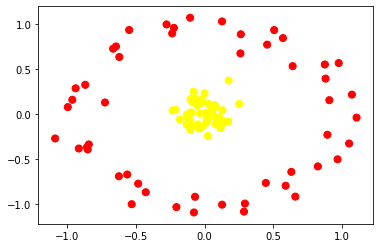

In [39]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

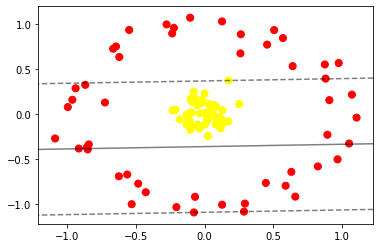

In [40]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [41]:
r = np.exp(-(X**2).sum(1))

In [42]:
r

array([0.42077834, 0.34133374, 0.97149223, 0.29370937, 0.9956956 ,
       0.99874158, 0.31247046, 0.95353905, 0.98357543, 0.97315795,
       0.42717919, 0.33038969, 0.35283802, 0.30723781, 0.98488922,
       0.34234667, 0.42903289, 0.98567083, 0.84277985, 0.39364274,
       0.33924163, 0.42788949, 0.97933591, 0.96005439, 0.96449194,
       0.35867316, 0.98361121, 0.45302208, 0.94513115, 0.97396259,
       0.98140672, 0.98576686, 0.98712974, 0.4215615 , 0.92670772,
       0.99361391, 0.30195181, 0.98224476, 0.96110212, 0.9647888 ,
       0.27891989, 0.94298728, 0.97374854, 0.97454056, 0.30499242,
       0.37346898, 0.45812369, 0.98753044, 0.46461389, 0.36774601,
       0.42329932, 0.3622916 , 0.57999951, 0.42017909, 0.44639713,
       0.98918189, 0.30211815, 0.38021934, 0.37319747, 0.39232917,
       0.9855468 , 0.49826445, 0.29769838, 0.34267858, 0.99483711,
       0.37597827, 0.98848948, 0.27756038, 0.98326151, 0.94746851,
       0.37796597, 0.98648451, 0.2838735 , 0.41533855, 0.99684

In [43]:
from mpl_toolkits import mplot3d

In [55]:
def plot_3D(elev=30, azim=30, X=X,Y=Y,r=r):
        ax = plt.subplot(projection="3d")
        ax.scatter3D(X[:,0], X[:,1], r, c=Y, s=50, cmap="autumn")
        ax.view_init(elev=elev,azim=azim)
        
        ax.set_xlabel("x[0]")
        ax.set_ylabel("x[1]")
        ax.set_zlabel("r")

In [53]:
from ipywidgets import interact, fixed

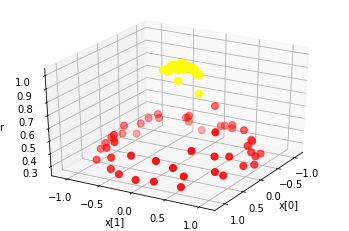

<function __main__.plot_3D(elev=30, azim=30, X=array([[-6.24998418e-01, -6.89221342e-01],
       [-2.77695106e-01,  9.98889386e-01],
       [-9.46098819e-02,  1.41318717e-01],
       [ 1.10625000e+00, -3.70873110e-02],
       [ 6.36933343e-02, -1.60264198e-02],
       [-3.37634268e-02,  1.09196725e-02],
       [-1.05989213e-01,  1.07331805e+00],
       [-2.12314186e-01,  4.99758323e-02],
       [-2.81357995e-02,  1.25575973e-01],
       [-7.45306243e-02,  1.47153200e-01],
       [ 8.93772623e-01, -2.27425164e-01],
       [-2.05883475e-01, -1.03203412e+00],
       [ 5.69854703e-01,  8.46765506e-01],
       [-5.49947805e-01,  9.36851438e-01],
       [ 6.80510498e-02,  1.02932846e-01],
       [ 8.75112877e-01,  5.53271053e-01],
       [-7.03899202e-02, -9.17206065e-01],
       [ 8.29373002e-02,  8.69150831e-02],
       [ 1.74109728e-01,  3.75147055e-01],
       [ 8.80484566e-01,  3.96306018e-01],
       [ 1.26486042e-01,  1.03200966e+00],
       [ 9.07924759e-01,  1.56725734e-01],
       

In [57]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], azim=[-180,-150,-120,90,-60,-30,0,30,60,90,120,150,160,180], X= fixed(X), Y= fixed(Y), r= fixed(r))#creo slider 
#esa N la tuve que cambiar manualmente de -90 o 200 para ver como cambia el grafico y aun se conservan los
#mismos puntos de soporte